# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_df = pd.merge(study_results, mouse_metadata, how='left', on= 'Mouse ID')
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_study_df['Mouse ID'].unique().size

mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study_df[mouse_study_df.duplicated(['Mouse ID','Timepoint'], keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study_df[mouse_study_df['Mouse ID']!='g989']
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_clean_mice = clean_mouse_study['Mouse ID'].unique().size
number_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = clean_mouse_study.groupby(['Drug Regimen'])
mean_tumor_volume = regimen_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_group['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_group['Tumor Volume (mm3)'].var()
std_tumor_volume = regimen_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_group['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Vol": mean_tumor_volume,
                              "Median Tum Vol": median_tumor_volume,
                              "Tum Vol Variance": variance_tumor_volume,
                              "Tum Vol Std.Dev.": std_tumor_volume, 
                              "Tumor Vol Std.Err.": sem_tumor_volume}).style.set_caption("Tumour Volume (mm3)")

summary_statistics

,Mean Tumor Vol,Median Tum Vol,Tum Vol Variance,Tum Vol Std.Dev.,Tumor Vol Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

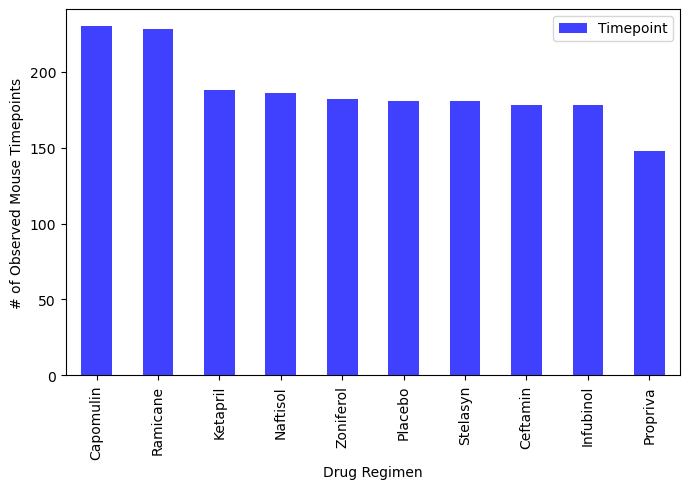

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = clean_mouse_study[["Timepoint", "Drug Regimen"]].groupby(["Drug Regimen"]).count()
sorted_timepoints = total_timepoints.sort_values(["Timepoint"], ascending=False)
timepoints_chart = sorted_timepoints.plot(kind="bar", figsize=(7,5), color ='b', alpha = 0.75 )
timepoints_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.savefig('MuseRegimenPandas.png')
plt.show()

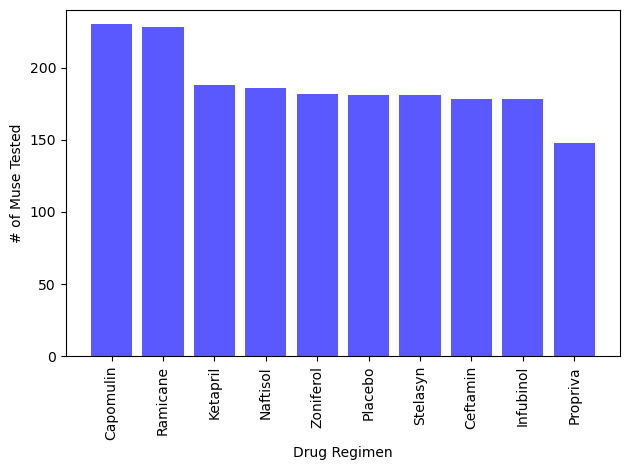

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_muse= clean_mouse_study.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
mice_list = drug_muse.tolist()
drug_muse_df= drug_muse.to_frame()
drug_mice_df1 = drug_muse_df.reset_index()
drug_list = drug_mice_df1['Drug Regimen'].tolist()
plt.bar(drug_list, mice_list, color='b', alpha = 0.65)
plt.xticks(rotation='vertical')
plt.ylim(0, max(mice_list)+10)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Muse Tested')
plt.tight_layout()
plt.savefig('MuseRegimenPyplot.png')
plt.show()

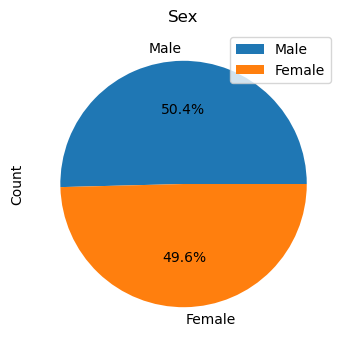

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_of_mouse = clean_mouse_study[['Mouse ID','Sex']]
sex_of_mouse = sex_of_mouse.drop_duplicates()
# Get the unique mice with their gender
male_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Male']
male_mouse_count = male_mouse['Sex'].count()
female_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Female']
female_mouse_count= female_mouse['Sex'].count()
# Make the pie chart
df=pd.DataFrame([{'Sex':'Male', 'Count': male_mouse_count}, {'Sex':'Female', 'Count': female_mouse_count}])
df.plot.pie(title= 'Sex', y='Count',figsize=(4,4),labels=['Male','Female'], autopct='%1.1f%%')
plt.savefig('PieDistribution.png')
plt.show()

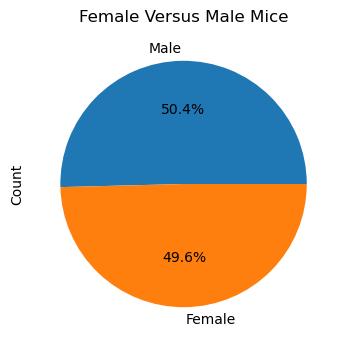

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
male_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Male']
male_mice = male_mouse['Sex'].count()

female_mouse = sex_of_mouse[sex_of_mouse['Sex'] =='Female']
female_mice= female_mouse['Sex'].count()
# Get the unique mice with their gender
new_df=pd.DataFrame([{'Sex':'Male', 'Count': male_mice}, {'Sex':'Female', 'Count': female_mice}])
y= pd.array([male_mice, female_mice])

# Make the pie chart
fig=plt.figure(figsize=(4,4))
plt.pie(y, labels=['Male','Female'],autopct='%1.1f%%')
plt.title('Female Versus Male Mice')
plt.ylabel('Count')
plt.savefig('FemaleVersMale.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs=clean_mouse_study.loc[(clean_mouse_study['Drug Regimen']=='Capomulin')|
                                   (clean_mouse_study['Drug Regimen']=='Ramicane')|
                                   (clean_mouse_study['Drug Regimen']=='Infubinol')|
                                   (clean_mouse_study['Drug Regimen']=='Ceftamin'),:]
        
# Start by getting the last (greatest) timepoint for each mouse
four_drugs=four_drugs.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_drugs=pd.merge(four_drugs,clean_mouse_study[['Mouse ID','Timepoint','Tumor Volume (mm3)']],
                    on=['Mouse ID','Timepoint'], how='left')
four_drugs.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumors=[[]for i in range(4)]
for x in range(100):
        drug= four_drugs.iloc[x,:]['Drug Regimen']
        tum= four_drugs.iloc[x,:]['Tumor Volume (mm3)']
        for y in range(4):
            if drug==treatments[y]:
                Tumors[y].append(tum)
                continue

# Calculate the IQR and quantitatively determine if there are any potential outliers.
q1= [[] for i in range(4)]
q3= [[] for i in range(4)] 
qrt=[[] for i in range(4)]
iqr=[[] for i in range(4)]
lower_limit=[[] for i in range(4)]
upper_limit=[[] for i in range(4)] 
pot_outls=[[] for i in range(4)]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
for n, num in enumerate(treatments):
    qrt[n] = four_drugs.loc[four_drugs["Drug Regimen"]==num,:]["Tumor Volume (mm3)"].quantile([.25,0.5,.75])
    q1[n] = qrt[n][0.25]
    q3[n] = qrt[n][0.75]
    iqr[n] = q3[n]-q1[n]  

    # Determine outliers using upper and lower bounds
    print(f"The lower quartile of {num} tumor volume is: {q1[n]}")
    print(f"The upper quartile of {num} tumor volume is: {q3[n]}")
    print(f"The interquartile range of {num} tumor volume is: {iqr[n]}")
    print(f"The median of {num} tumor volume is: {qrt[n][0.5]}") 


    lower_limit[n] = q1[n] - (1.5*iqr[n])
    upper_limit[n] = q3[n] + (1.5*iqr[n])
    print(f"Values below {lower_limit[n]} could be outliers.")
    print(f"Values above {upper_limit[n]} could be outliers.")

    for t in Tumors [n]:
        if t>upper_limit[n] or t< lower_limit[n]:
            pot_outls[n].append(t)
        
    if len(pot_outls[n])>0:
        print(f"The potential outlier for {num} is: {pot_outls[n]}\n")
    else:
        print(f"There are no potential outliers for {num}.\n")


The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The median of Capomulin tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no potential outliers for Capomulin.

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The median of Ramicane tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
There are no potential outliers for Ramicane.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The median of Infubinol tumor vol

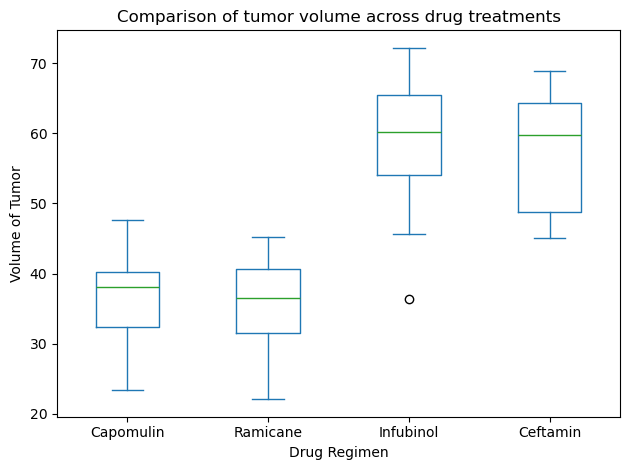

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
Capomulin = [] 
Ramicane = [] 
Infubinol = [] 
Ceftamin = []

for x in range(100):
        drug= four_drugs.iloc[x,:]['Drug Regimen']
        tum= four_drugs.iloc[x,:]['Tumor Volume (mm3)']
        if drug=='Capomulin':
            Capomulin.append(tum)
        if drug=='Ramicane':
            Ramicane.append(tum)
        if drug=='Infubinol':
            Infubinol.append(tum)
        if drug=='Ceftamin':
            Ceftamin.append(tum)    
            continue

data =pd.DataFrame({'Capomulin':Capomulin, 'Ramicane': Ramicane, 'Infubinol':Infubinol, 'Ceftamin':Ceftamin})
ax = data[['Capomulin','Ramicane','Infubinol','Ceftamin']].plot(kind='box', title="Tumor volumes Distribution by Drug Treatments", ylabel='Final Tumor Volume(mm3)')
ax.set(title= 'Comparison of tumor volume across drug treatments', xlabel= "Drug Regimen", ylabel='Volume of Tumor')
plt.tight_layout()
plt.savefig('TumorValueStatistics.png')
plt.show()


## Line and Scatter Plots

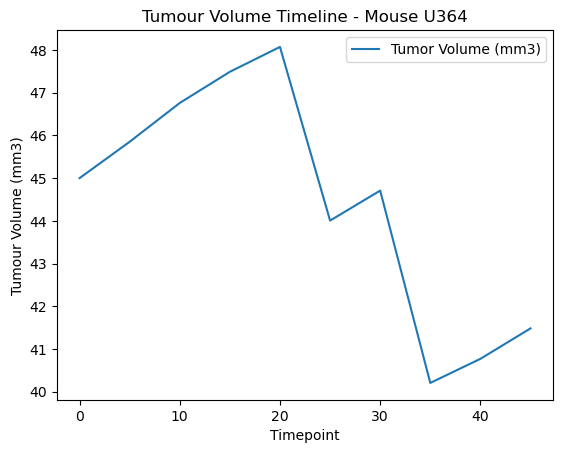

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_only = clean_mouse_study.loc[(clean_mouse_study['Drug Regimen']=='Capomulin') & 
                                (clean_mouse_study['Mouse ID']=='l509')][['Timepoint','Tumor Volume (mm3)']]
capomulin_only.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volume (mm3)')
plt.title("Tumour Volume Timeline - Mouse U364")
plt.savefig('LineChart.png')                                   


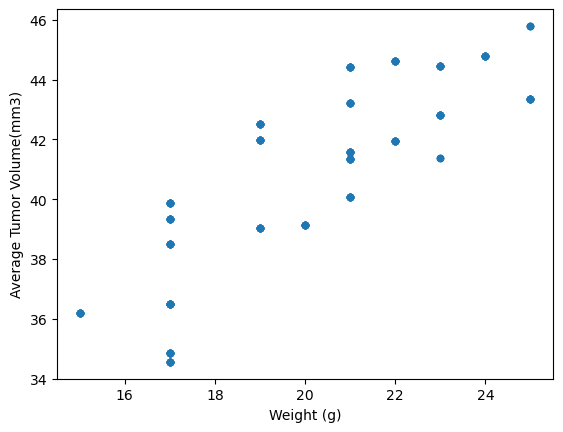

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_tum = clean_mouse_study.loc[(clean_mouse_study['Drug Regimen']=='Capomulin')]      
avg_tumor_vol = pd.DataFrame(cap_tum.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume(mm3)'})     
mouse_wt = cap_tum[['Mouse ID','Weight (g)']]
new_df= mouse_wt.merge(avg_tumor_vol, how='left', on='Mouse ID')
new_df.plot.scatter(x='Weight (g)', y='Average Tumor Volume(mm3)')
plt.savefig('ScatterChart.png')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.83


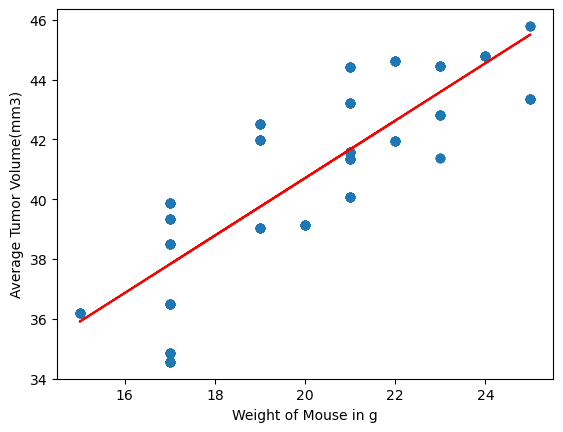

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
new_df
x_values = new_df['Weight (g)']
y_values = new_df['Average Tumor Volume(mm3)']
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight of Mouse in g')
plt.ylabel('Average Tumor Volume(mm3)')
plt.savefig('CorrelationChart.png')
plt.show()